In [1]:
import sys 
sys.path.append('/home/public/benyuansong') 
from DID import did
from DID import preprocessing
import pandas as pd

In [2]:
file = pd.read_csv('/home/public/ks_live_stream/live_chat_author_data_20190213_v1.csv')
file = file.drop(['live_chat_success'],axis=1)
outcome = ['live_stream_cnt','live_stream_duration','total_watching_duration','receive_amount','like_cnt','comment_cnt','share_cnt','pk_cnt','voice_comment_cnt']

In [3]:
file = preprocessing.did_preprocessing(file, treatment_col = 'treatment', name_col = 'user_id', date_col = 'live_date')

In [4]:
did.algorithm_show(file, -9, by_treatment=False, label='if_on')

/home/benyuansong/DID.py:127: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train)
/root/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/py37/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/py37/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/root/py37/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was 

,RandomForest,LogisticRegression,LightGBM,XGBoost
accuracy,0.639300,0.690859,0.668528,0.671189
auc_score,0.654740,0.637331,0.667557,0.666777
precision,0.271379,0.285970,0.289714,0.290582
recall,0.564391,0.448980,0.546158,0.540081
f1score,0.366522,0.349398,0.378598,0.377862
precision_0,0.869148,0.856457,0.871199,0.870450
recall_0,0.656291,0.745723,0.696284,0.700927
f1score_0,0.747869,0.797263,0.773982,0.776544


In [4]:
matched,pscore,match_id,feature_importance=did.matching(file, -9, model='LightGBM', by_treatment=False ,label='if_on', caliper=0.05,top=10)
feature_importance

/root/py37/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/py37/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,column,feature_importance
0,live_duration_7d,294
5,pk_cnt_7d,202
4,total_enter_Live_cnt_7d,195
1,receive_cnt_7d,193
3,like_cnt_7d,182
2,receive_amount_7d,141
6,voice_comment_cnt_7d,135
7,live_chat_num_7d,105
30,gender_F,103
12,is_install_jdqs_cjzc,92


/root/py37/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


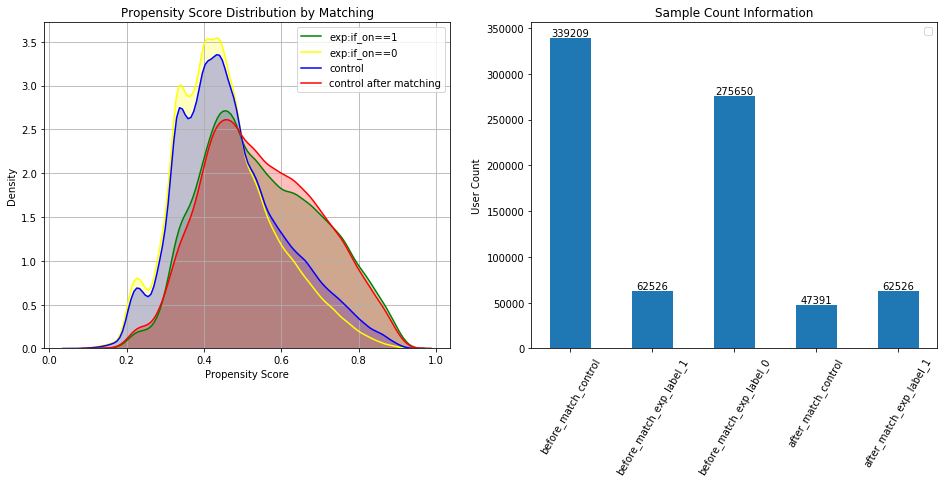

In [5]:
did.plotMatchedSample(file,pscore,match_id,by_treatment=False,label='if_on')

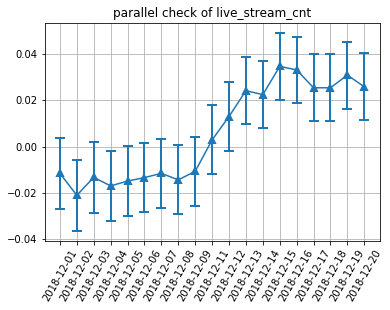

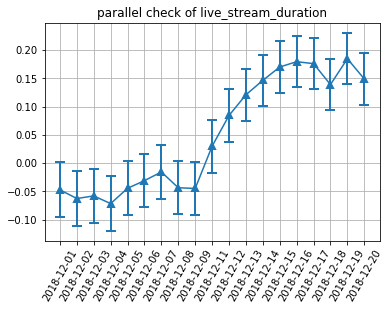

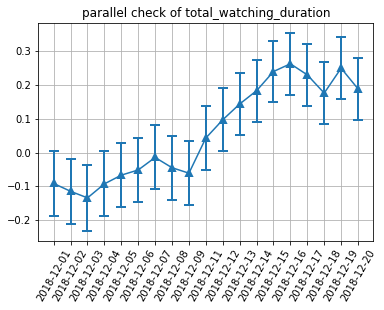

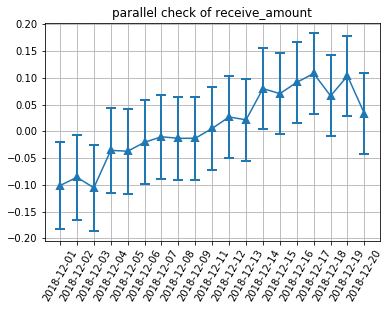

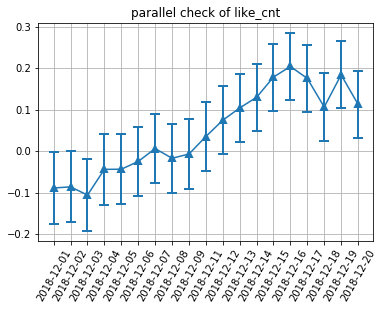

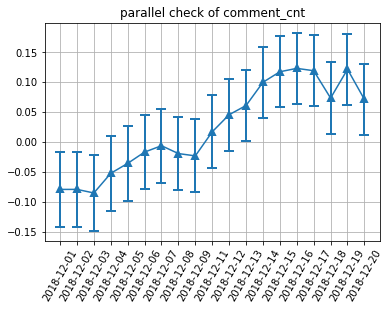

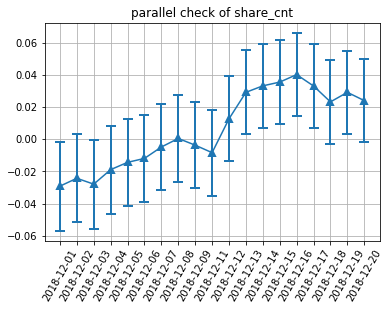

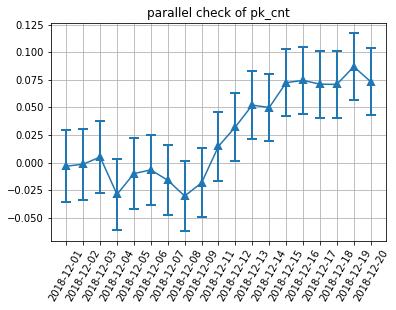

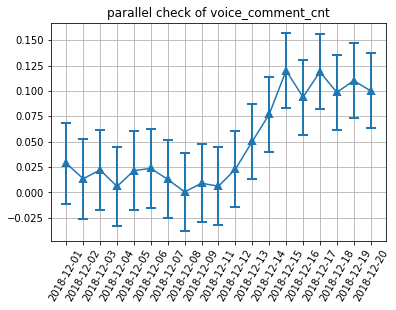

In [12]:
check_parallel(matched, outcome, '2018-12-11', step = 1)

In [7]:
did.check_covariate_balance(matched,feature_importance['column'])

,treated,control,dif,bias
live_duration_7d,20297.675741,21418.196091,1120.520350,0.036415
pk_cnt_7d,20.668232,21.710253,1.042021,0.016589
total_enter_Live_cnt_7d,4918.155785,6383.311952,1465.156167,0.012102
receive_cnt_7d,300.066727,351.276705,51.209978,0.030020
like_cnt_7d,11004.212975,12109.338903,1105.125928,0.003814
receive_amount_7d,22215.022713,28770.734467,6555.711754,0.027925
voice_comment_cnt_7d,48.360551,52.343416,3.982865,0.019477
live_chat_num_7d,2.683488,2.796644,0.113156,0.011477
gender_F,0.431448,0.438762,0.007314,0.014754
is_install_jdqs_cjzc,0.317252,0.312092,0.005161,0.011114


In [8]:
did.result(matched,outcome,'2018-12-11')

live_stream_cnt: 3.66% 3.3324588260271e-42 显著
live_stream_duration: 18.10% 5.340427428965237e-118 显著
total_watching_duration: 24.93% 2.677531950370637e-63 显著
receive_amount: 10.13% 9.471504690477974e-17 显著
like_cnt: 17.16% 4.724291247813137e-38 显著
comment_cnt: 12.33% 9.242969650048142e-37 显著
share_cnt: 3.85% 7.875332119147698e-20 显著
pk_cnt: 7.20% 1.0487063854564094e-37 显著
voice_comment_cnt: 6.96% 6.993944174245972e-21 显著
